# We use a dual 12bit PWM DAC 
>  https://www.analog.com/media/en/technical-documentation/data-sheets/LTC2644.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### From the datashet we extract the formula for Vout using the intenernal 2.5v reference

>  The resolution of the DAC is Vref/(2^N - 1), where N is the number of DAC bits

> DAC_VOUT = k/2^N * Vref, where k = 2^N * tp_h * t

> tp_h is the time of t

In [2]:
N =12
max_resolution = 2.5/(2**N-1)
max_resolution

0.0006105006105006105

In [3]:
def time_on_adc(f, v_out, vref): 
    period = 1/f
    time_on = (v_out-period)/vref
    return time_on * period

In [4]:
time_on_adc(5*10**3, 1.25, 2.5)

9.998400000000001e-05

### Now we will generate a range() of voltage with a step = max_resolution 
### and we save the data in two columns: time_on | v_out 

In [5]:
voltage_to_test = np.arange(0,2.5,max_resolution)  #GENERATION OF THE STEP OF VOLTAGE

In [12]:
#data generation
data_v_out = []
data_t_on = []
ns_cycles = []


#I use 5khz for Frecuency Inx inputs and 2.5V internal reference
for i in voltage_to_test:
    data_v_out.append(i)
    data_t_on.append(time_on_adc(5*10**3, i, 2.5))  # fec INx, v_out, vref
    ns_cycles.append( round(10**9 * time_on_adc(5*10**3, i, 2.5)))
#generate the equivalent cylces in ns
for i in voltage_to_test:
    data_v_out.append(i)
    data_t_on.append(time_on_adc(5*10**3, i, 2.5))  # fec INx, v_out, vref

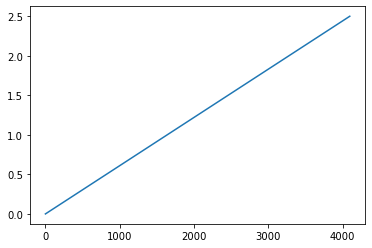

In [7]:
plt.plot(data_v_out)

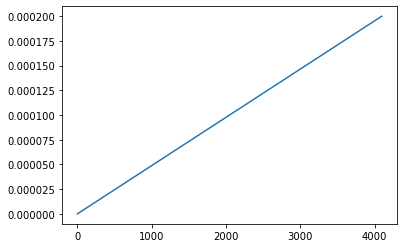

In [8]:
plt.plot(data_t_on)

In [13]:

data = [data_v_out, data_t_on]  
# Create the pandas DataFrame
df = pd.DataFrame(list(zip(data_v_out, data_t_on, ns_cycles)),
               columns =['ADC_Vout', 'Time_On', 'Ns_cycles'])
  
# print dataframe.
df

,ADC_Vout,Time_On,Ns_cycles
0,0.000000,-1.600000e-08,-16
1,0.000611,3.284005e-08,33
2,0.001221,8.168010e-08,82
3,0.001832,1.305201e-07,131
4,0.002442,1.793602e-07,179
...,...,...,...
4090,2.496947,1.997398e-04,199740
4091,2.497558,1.997886e-04,199789
4092,2.498168,1.998375e-04,199837
4093,2.498779,1.998863e-04,199886


4096

33